In [5]:
import pandas as pd

df = pd.read_csv('HR_Employee_Attrition.csv')

columns_to_drop = ['Over18', 'StandardHours', 'EmployeeCount']
df.drop(columns=columns_to_drop, inplace=True)

df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

income_bins = [0, 3000, 7000, df['MonthlyIncome'].max()]
income_labels = ['Low', 'Medium', 'High']
df['Income_Level'] = pd.cut(df['MonthlyIncome'], bins=income_bins, labels=income_labels)

tenure_bins = [0, 3, 7, df['YearsAtCompany'].max()]
tenure_labels = ['Short-Term', 'Mid-Term', 'Long-Term']
df['Tenure_Level'] = pd.cut(df['YearsAtCompany'], bins=tenure_bins, labels=tenure_labels)

df.to_csv('HR_Employee_Attrition_Enhanced.csv', index=False)

In [7]:
import pandas as pd
df = pd.read_csv("HR_Employee_Attrition_Enhanced.csv")

print(df.isnull().sum())

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
Attritio

In [9]:
df['Tenure_Level'] = df['Tenure_Level'].fillna('Unknown')
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition_Flag              0
Income_Lev

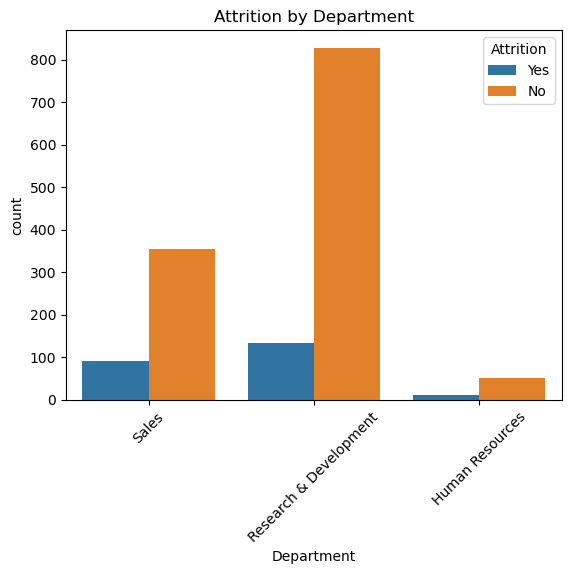

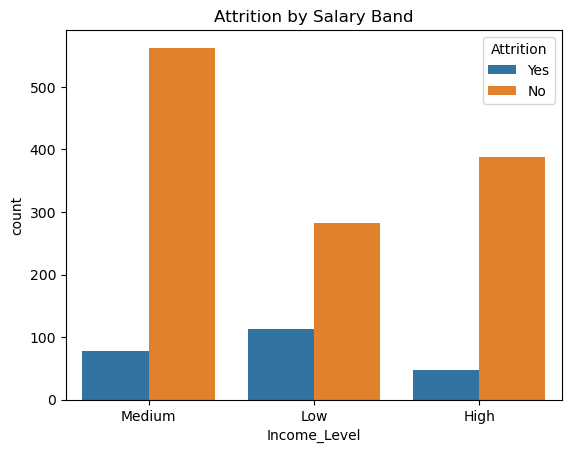

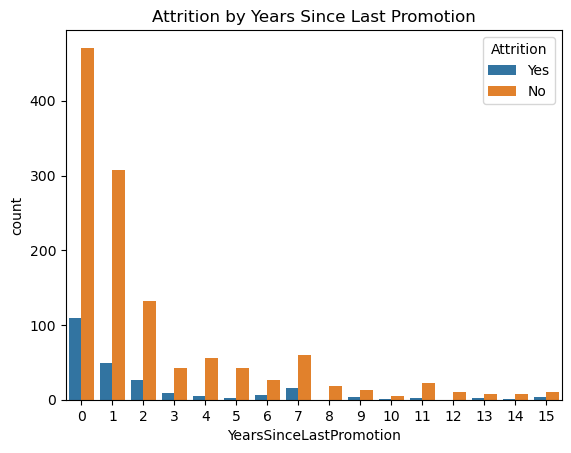

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

# Salary Band vs Attrition
sns.countplot(data=df, x='Income_Level', hue='Attrition')
plt.title('Attrition by Salary Band')
plt.show()

# Promotion vs Attrition
sns.countplot(data=df, x='YearsSinceLastPromotion', hue='Attrition')
plt.title('Attrition by Years Since Last Promotion')
plt.show()

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       255
           1       0.23      0.15      0.18        39

    accuracy                           0.82       294
   macro avg       0.55      0.54      0.54       294
weighted avg       0.79      0.82      0.80       294


Confusion Matrix:
[[235  20]
 [ 33   6]]


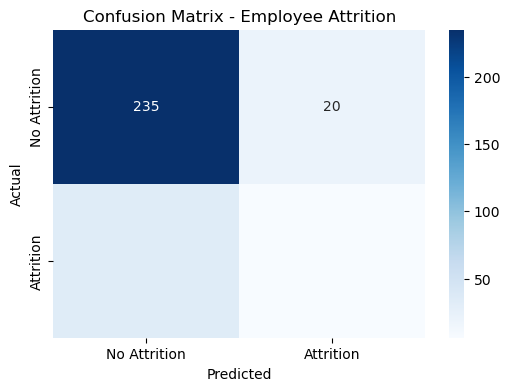

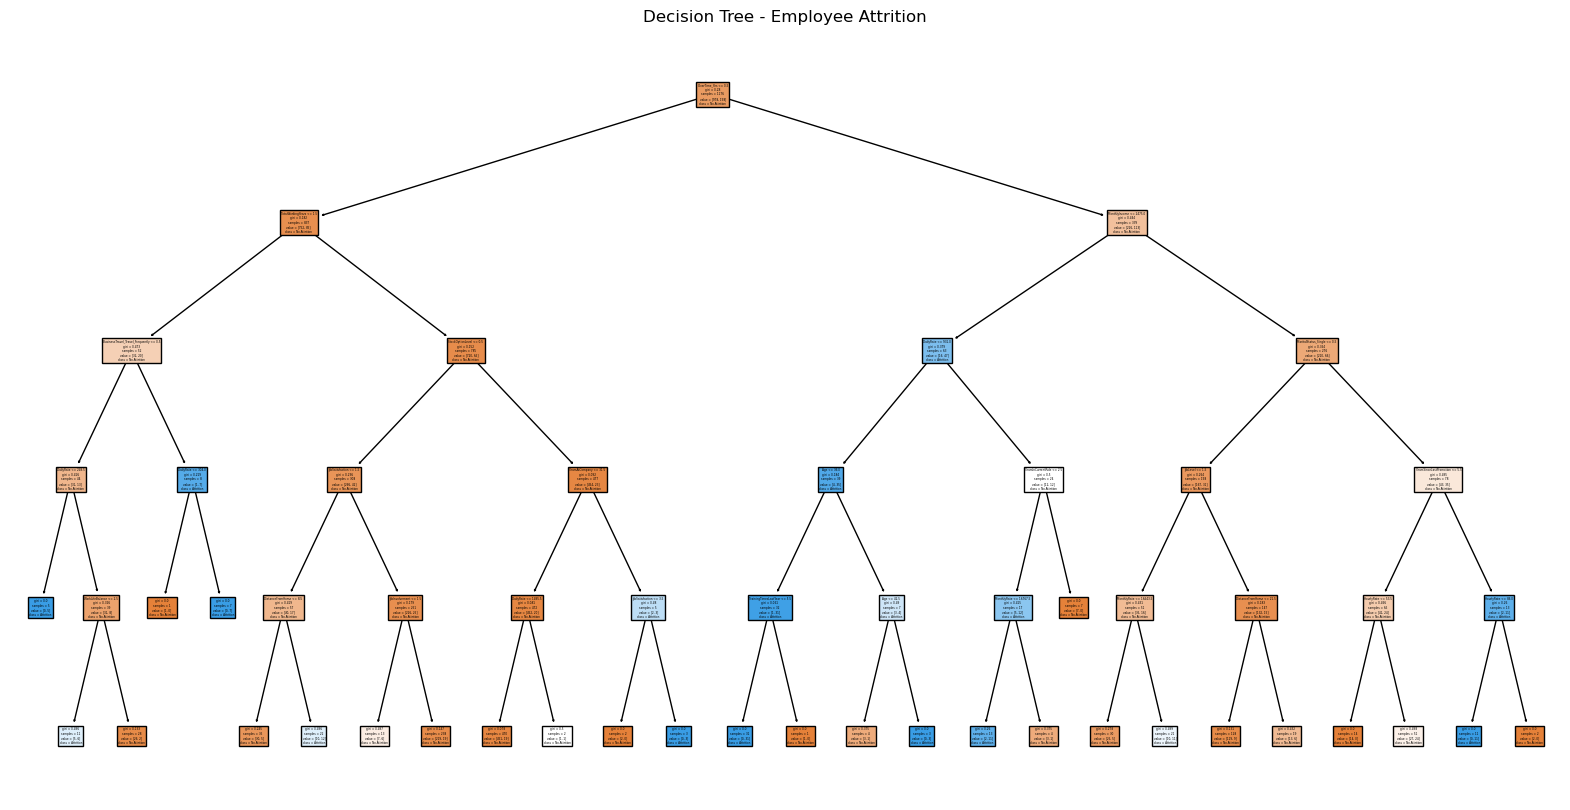

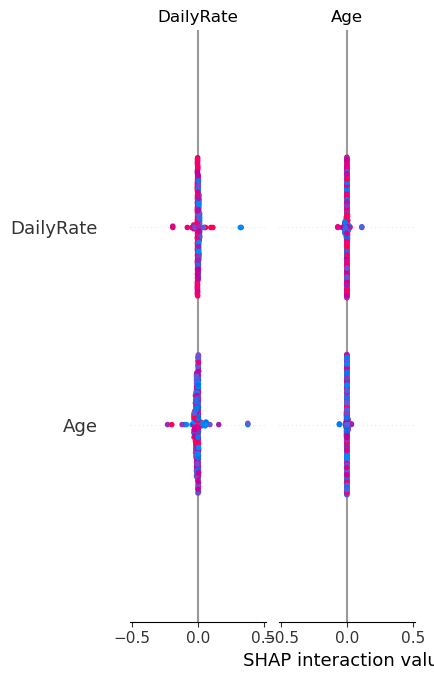

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (49, 2)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap

df = pd.read_csv("HR_Employee_Attrition_Enhanced.csv")

df_encoded = pd.get_dummies(df.drop(columns=['Attrition']), drop_first=True)

X = df_encoded.drop(columns=['Attrition_Flag']).astype(float)
y = df_encoded['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Employee Attrition")
plt.show()

from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Attrition", "Attrition"])
plt.title("Decision Tree - Employee Attrition")
plt.show()

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.plots.waterfall(shap_values[0])

In [7]:
import pandas as pd
df = pd.read_csv("HR_Employee_Attrition_Enhanced.csv")
output_path = r"C:\Users\ushas\OneDrive\Desktop\HR_Employee_Attrition_Enhanced.csv"
df.to_csv(output_path, index=False)
print("Cleaned file saved to Desktop!")

Cleaned file saved to Desktop!
